One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. 

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

SAT scores by school - SAT scores for each high school in New York City
School attendance - Attendance information for each school in New York City
Class size - Information on class size for each school
AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
Graduation outcomes - The percentage of students who graduated, and other outcome information
Demographics - Demographic information for each school
School survey - Surveys of parents, teachers, and students at each school
All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

In [1]:
import pandas as pd
import os

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    base = file.split('.')[0]
#     path = os.path.join('Dataquest', 'DataCleaning', 'schools', file)
    path = os.path.join('schools', file)
    data[base] = pd.read_csv(path)

Display the first five rows of the SAT scores data.

Use the key sat_results to access the SAT scores dataframe stored in the dictionary data.

Use the pandas.DataFrame.head() method along with the print() function to display the first five rows of the dataframe.

In [3]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg., Score SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.
- Given these observations, let's explore the other data sets to see if we can gain any insight into how to combine them.

In [4]:
for db in data.values():
    print(db.head(5))

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

We can make some observations based on the first few rows of each one.

- Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.

Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.

Each survey text file looks like this:

dbn  bn  schoolname  d75 studentssurveyed    highschool  schooltype  rr_s

"01M015"    "M015"  "P.S. 015 Roberto Clemente" 0   "No"    0   "Elementary School"     88

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used, and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, here's a good primer.

We'll need to specify the encoding and delimiter to the pandas pandas.read_csv() function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the pandas.concat() function:

z = pd.concat([x,y], axis=0)

The code above will combine dataframes x and y by essentially appending y to the end of x. The combined dataframe z will have the number of rows in x plus the number of rows in y.

In [5]:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')

In [6]:
survey = pd.concat([all_survey, d75_survey], axis=0)

In [7]:
survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.

- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.

First, we'll need filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the original data download location. The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Based on the dictionary, it looks like these are the relevant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN.

In [8]:
# Rename dbn column

survey.rename(columns={'dbn': 'DBN'}, inplace=True)

# Filter out columns

columns_to_keep = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", 
                   "N_p", "saf_p_11", "com_p_11", "eng_p_11", 
                   "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
                   "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", 
                   "aca_s_11", "saf_tot_11", "com_tot_11", 
                   "eng_tot_11", "aca_tot_11"]

survey = survey[columns_to_keep]

# Add survey to data dict

data['survey'] = survey

When we explored all of the data sets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.

However, class_size doesn't appear to have the column at all.

From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. 

As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the pandas pandas.DataFrame.apply() method, along with a custom function that:

Takes in a number.
Converts the number to a string using the str() function.
Check the length of the string using the len() function.
If the string is two digits long, returns the string.
If the string is one digit long, adds a 0 to the front of the string, then returns it.
You can use the string method zfill() to do this.
Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]

In [9]:
def pad_if_single_dig(digit):
    """Returns a single digit number padded with 0 on the left. 
    Converts unchanged number to string if more than one digit."""
    
    if len(str(digit)) == 1:
        return str(digit).zfill(2)
    else:
        return str(digit)

In [10]:
# Rename 'dbn' column in hs_directory to 'DBN'
data['hs_directory'].rename(columns={'dbn': 'DBN'}, inplace=True)

# Create DBN column in class_size
data['class_size']['DBN'] = data['class_size']['CSD'].apply(pad_if_single_dig) + data['class_size']['SCHOOL CODE']

data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015


Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type.

- Use the pandas.to_numeric() function on each of the columns, and assign the result back to the same column.
- Pass in the keyword argument errors="coerce".

Create a column called sat_score in sat_results that holds the combined SAT score for each student.
- Add up SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score, and assign the total to the sat_score column of sat_results.

Display the first few rows of the sat_score column of sat_results to verify that everything went okay.

In [11]:
s1 = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors='coerce')
s2 = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors='coerce')
s3 = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors='coerce')

data['sat_results']['sat_score'] = s1 + s2 + s3

data['sat_results'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0


Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory data set.

Let's take a look at the first few rows:

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)
We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

We can do the extraction with a regular expression. The following expression will pull out everything inside the parentheses:

import re
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")

This command will return (40.8276026690005, -73.90447525699966). We'll need to process this result further using the string methods split() and replace() methods to extract each coordinate.

Write a function that:

- Takes in a string
- Uses the regular expression above to extract the coordinates
- Uses string manipulation functions to pull out the latitude
- Returns the latitude

Use the df.apply() method to apply the function across the Location 1 column of hs_directory. Assign the result to the lat column of hs_directory.

Display the first few rows of hs_directory to verify the results.

Do the same for longitude and change the datatypes of both columns to numeric.

In [12]:
import re

def extract_lat(string):
    """Extracts lat, long coordinates of the form (x, y) from a longer string."""
    str_coords = re.findall("\(.+\)", string)[0].split(',')
    lat, lon = float(str_coords[0].replace('(', '')), float(str_coords[1].replace(')', ''))
    return lat

def extract_lon(string):
    """Extracts lat, long coordinates of the form (x, y) from a longer string."""
    str_coords = re.findall("\(.+\)", string)[0].split(',')
    lat, lon = float(str_coords[0].replace('(', '')), float(str_coords[1].replace(')', ''))
    return lon

In [13]:
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(extract_lat)
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(extract_lon)
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')

data['hs_directory'].head(3)

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,40.842414,-73.916162


The values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values, however. We'll need to condense these data sets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the data sets.

To resolve this issue, we'll condense the class_size, graduation, and demographics data sets so that each DBN is unique.

The first data set that we'll condense is class_size.

As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)
Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

- Create a new variable called class_size, and assign the value of data["class_size"] to it.
- Filter class_size so the GRADE column only contains the value 09-12. Note that the name of the GRADE column has a space at the end; you'll generate an error if you don't include it.
- Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
- Display the first five rows of class_size to verify.

In [14]:
class_size = data['class_size']
class_size = class_size[(class_size['GRADE '] == '09-12') & (class_size['PROGRAM TYPE'] == 'GEN ED')]
class_size.head(5)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


As we saw when we displayed class_size on the last screen, DBN still isn't completely unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.

CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) seem to pertain to different kinds of classes. For example, here are the unique values for CORE SUBJECT (MS CORE and 9-12 ONLY):

In [15]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

Fortunately, we can use the pandas.DataFrame.groupby() method to help us with this. The DataFrame.groupby() method will split a dataframe up into unique groups, based on a given column. We can then use the agg() method on the resulting pandas.core.groupby object to find the mean of each column.

Using the groupby() method, we'll split this dataframe into four separate groups -- one with the DBN 01M292, one with the DBN 01M332, one with the DBN 01M378, and one with the DBN 01M448.

Then, we can compute the averages for the AVERAGE CLASS SIZE column in each of the four groups using the agg() method.

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use pandas.DataFrame.reset_index(). This method will reset the index to a list of integers and make DBN a column again.

Find the average values for each column associated with each DBN in class_size.
- Use the pandas.DataFrame.groupby() method to group class_size by DBN.
- Use the agg() method on the resulting pandas.core.groupby object, along with the numpy.mean() function as an argument, to calculate the average of each group.
- Assign the result back to class_size.

Reset the index to make DBN a column again.
- Use the pandas.DataFrame.reset_index() method, along with the keyword argument inplace=True.

Assign class_size back to the class_size key of the data dictionary.

Display the first few rows of data["class_size"] to verify that everything went okay.

In [16]:
import numpy as np

class_size = class_size.groupby('DBN').agg(np.mean)  # default is np.mean I think.
class_size.reset_index(inplace=True) 

data['class_size'] = class_size

class_size.head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now that we've finished condensing class_size, let's condense demographics. 

In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

Filter demographics, only selecting rows in data["demographics"] where schoolyear is 20112012.
- schoolyear is actually an integer, so be careful about how you perform your comparison.

Display the first few rows of data["demographics"] to verify that the filtering worked.

In [17]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


Finally, we'll need to condense the graduation data set. 

The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

Filter graduation, only selecting rows where the Cohort column equals 2006.

Filter graduation, only selecting rows where the Demographic column equals Total Cohort.

Display the first few rows of data["graduation"] to verify that everything worked properly.

In [18]:
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == '2006') & (data['graduation']['Demographic'] == 'Total Cohort')]

data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


We're almost ready to combine all of the data sets. The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

Note that the first column name above, AP Test Takers, has a trailing space at the end.

Instructions

Convert each of the following columns in ap_2010 to numeric values using the pandas.to_numeric() function with the keyword argument errors="coerce".
- AP Test Takers
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

Display the column types using the dtypes attribute.

In [19]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')

data['ap_2010'][cols].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Both the ap_2010 and the graduation data sets have many missing DBN values, so we'll use a left join when we merge the sat_results data set with them. Because we're using a left join, our final dataframe will have all of the same DBN values as the original sat_results dataframe.

We'll need to use the pandas df.merge() method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into df.merge().

Because we're using the DBN column to join the dataframes, we'll need to specify the keyword argument on="DBN" when calling pandas.DataFrame..merge().

First, we'll assign data["sat_results"] to the variable combined. Then, we'll merge all of the other dataframes with combined. When we're finished, combined will have all of the columns from all of the data sets.

Instructions

Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 data set into combined.

- Make sure to specify how="left" as a keyword argument to indicate the correct join type.
- Make sure to assign the result of the merge operation back to combined.

Use the pandas df.merge() method to merge the graduation data set into combined.
- Make sure to specify how="left" as a keyword argument to get the correct join type.
- Make sure to assign the result of the merge operation back to combined.

Display the first few rows of combined to verify that the correct operations occurred.

Use the pandas.DataFrame.shape() attribute to display the shape of the dataframe and see how many rows now exist.

In [20]:
combined = data["sat_results"]
print('Shape before merge:', combined.shape)
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')
print('Shape after merge:', combined.shape)

Shape before merge: (478, 7)
Shape after merge: (479, 33)


Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

Instructions

Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
- Be sure to follow the exact order above.
- Remember to specify the correct column to join on, as well as the correct join type.

Display the first few rows of combined to verify that the correct operations occurred.

Call pandas.DataFrame.shape() to display the shape of the dataframe to see how many rows now exist.

In [21]:
combined = (combined.merge(data['class_size'], how='inner', on='DBN')
                    .merge(data['demographics'], how='inner', on='DBN')
                    .merge(data['survey'], how='inner', on='DBN')
                    .merge(data['hs_directory'], how='inner', on='DBN'))

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [22]:
combined.shape

(363, 164)

You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column.

In the diagram above, the mean of the first column is (1800 + 1600 + 2200 + 2300) / 4, or 1975, and the mean of the second column is (20 + 30 + 30 + 50) / 4, or 32.5. We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the pandas.DataFrame.fillna() method. This method will replace any missing values in a dataframe with the values we specify. We can compute the mean of every column using the pandas.DataFrame.mean() method. If we pass the results of the df.mean() method into the df.fillna() method, pandas will fill in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:

means = df.mean()
df = df.fillna(means)

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the df.fillna() method along with the df.mean() method, because there won't be a mean.

We should fill any NaN or null values that remain after the initial replacement with the value 0. We can do this by passing 0 into the df.fillna() method.

In [23]:
combined.fillna(combined.mean(), inplace=True)
combined.fillna(0, inplace=True)

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

For example, we can use indexing to extract the first few characters of a string, like this:

name = "Sinbad"

print(name[0:2])

Instructions

- Write a function that extracts the first two characters of a string and returns them.
- Apply the function to the DBN column of combined, and assign the result to the school_dist column of combined.
- Display the first few items in the school_dist column of combined to verify the results.

In [24]:
def extract_first_two_chars(string):
    return string[:2]

combined['school_dist'] = combined['DBN'].apply(extract_first_two_chars)

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,0,129.028846,197.038462,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,0,129.028846,197.038462,...,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426,01


Use the pandas.DataFrame.corr() method on the combined dataframe to find all possible correlations. Assign the result to correlations.
- Filter correlations so that it only shows correlations for the column sat_score.
- Display all of the rows in correlations and look them over.

In [25]:
correlations = combined.corr()
correlations = correlations['sat_score']

correlations

sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent                            -0.398750
sped_num                                0.034933
sped_percent                           -0.448170
asian_num           

The numbers above represent the r value between the sat_score column and the named column.

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
    - Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.
- Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
- Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.
- Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

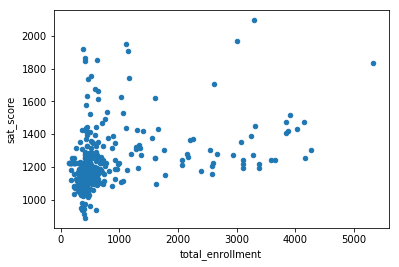

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

combined.plot.scatter(x='total_enrollment', y='sat_score')

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

Instructions
- Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. Assign the result to low_enrollment.
- Display all of the items in the School Name column of low_enrollment.
- Use Wikipedia and Google to research the names of the schools. Can you discover anything interesting about them?

In [27]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

Instructions

Create a scatterplot of ell_percent versus sat_score.

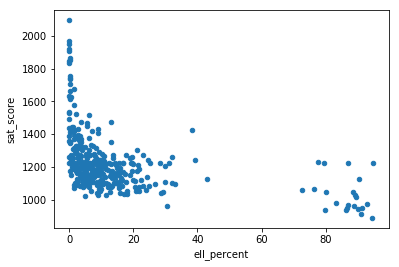

In [28]:
combined.plot.scatter(x='ell_percent', y='sat_score')

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

We learned how to use the Basemap package to create maps in the Visualizing Geographic Data mission. The Basemap package enables us to create high-quality maps, plot points over them, and then draw coastlines and other features.

We extracted the coordinates for all of the schools earlier, and stored them in the lat and lon columns. The coordinates will enable us to plot all of the schools on a map of New York City.

We can set up the map with this code:

In [29]:
# from mpl_toolkits.basemap import Basemap

# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)

This code snippet will create a map that centers on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the geographic area the map depicts). It will also draw coastlines and rivers accordingly.

Now all we need to do is convert our lat and lon coordinates to x and y coordinates so we can plot them on top of the map. This will show us where all of the schools in our data set are located.

As you may recall, in order to plot coordinates using Basemap, we need to:

Convert the pandas series containing the latitude and longitude coordinates to lists using the pandas.Series.tolist() method.
Make a scatterplot using the longitudes and latitudes with the scatter() method on the Basemap object.
Show the plot using the pyplot.show() method.
We also need to make sure we pass a few keyword arguments to the scatter() method:

- s - Determines the size of the point that represents each school on the map.
- zorder - Determines where the method draws the points (that represent schools) on the z axis. In other words, it determines the order of the layers on the map. If we set zorder to 2, the method will draw the points on top of the continents, which is where we want them.
- latlon - A Boolean value that specifies whether we're passing in latitude and longitude coordinates instead of x and y plot coordinates.

Set up the map using the code snippet you saw above -- the one that creates a map, then draws rivers, coastlines, and boundaries.

- Convert the lon column of combined to a list, and assign it to the longitudes variable.
- Convert the lat column of combined to a list, and assign it to the latitudes variable.
- Call the Basemap.scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
- Show the plot using the pyplot.show() method.

In [30]:
# longitudes = combined['lon'].tolist()
# latitudes = combined['lat'].tolist()

# m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
# plt.show()

From the map above, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

Now that we've plotted the school locations, we can begin to display meaningful information on the maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument c into the scatter() method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the c keyword argument to values ranging from 0 to 1. It will then map these values onto a colormap. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points for low numbers, and yellow points for high numbers.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument c=combined["ell_percent"], then the method would shade a school with a high ell_percent yellow, and a school with a low ell_percent green. We can specify the colormap we want to use by passing the cmap keyword argument to the scatter() method.

Instructions
- Set up the map using the code snippet that creates a map, then draws rivers, coastlines, and boundaries.
- Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value combined["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
- Show the plot using the show() method.

In [31]:
# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)

# m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined['ell_percent'], cmap='summer')
# plt.show()

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

In the last mission, we used the pandas.DataFrame.groupby() followed by the agg() method on the resulting object to find the mean class size for each unique DBN. The principle is exactly the same, except that here we'd find the mean of each column for each unique value in school_dist.

Instructions
- Find the average values for each column for each school_dist in combined.
- Use the pandas.DataFrame.groupby() method to group combined by school_dist.
- Use the agg() method, along with the numpy.mean function as an argument, to calculate the average of each group.
- Assign the result to the variable districts.
- Reset the index of districts, making school_dist a column again.
- Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.
- Display the first few rows of districts to verify that everything went okay.

In [32]:
districts = (combined.groupby('school_dist')
             .agg(np.mean)
             .reset_index())

districts.head()

,school_dist,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,115.244241,5.148538,22.675415,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,149.818949,5.686360,25.038118,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,156.005994,5.839200,23.716311,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,132.362265,5.192610,24.101048,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,120.623901,4.845101,24.290247,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


Now that we've taken the means of all of the columns, we can plot out ell_percent by district. Not only did we find the mean of ell_percent, but we also took the means of the lon and lat columns, which will give us the coordinates for the center of each district.

Instructions
- Use the code snippet from before that creates a map, then draws rivers, coastlines, and boundaries.
- Convert the lon column of districts to a list, and assign it to the longitudes variable.
- Convert the lat column of districts to a list, and assign it to the latitudes variable.
- Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=50 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value districts["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
- Show the plot using the show() method.

In [33]:
# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)

# longitudes = districts['lon'].tolist()
# latitudes = districts['lat'].tolist()

# m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts['ell_percent'], cmap='summer')
# plt.show()

There are several fields in combined that originally came from a survey of parents, teachers, and students. Make a bar plot of the correlations between these fields and sat_score.
- You can find a list of the fields in the survey_fields variable in the notebook.

Consult the data dictionary that's part of the zip file you can download from the City of New York's website.
- Did you find any surprising correlations?

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


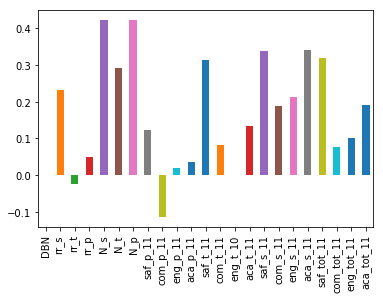

In [35]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

correlations[survey_fields].plot.bar()

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment. We'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

Instructions

Investigate safety scores.
- Make a scatter plot of the saf_s_11 column vs. the sat_score in combined.
- Write up your conclusions about safety and SAT scores in a Markdown cell.

Map out safety scores.
- Compute the average safety score for each district.
- Make a map that shows safety scores by district.
- Write up your conclusions about safety by geographic area in a Markdown cell. You may want to read up on the boroughs of New York City.

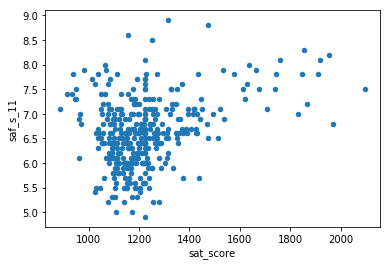

In [39]:
combined.plot.scatter(x='sat_score', y='saf_s_11')

In [40]:
# The districts df generated above has the average values for each district.

# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)
# m.fillcontinents(color='white',lake_color='#85A6D9')

# longitudes = districts['lon'].tolist()
# latitudes = districts['lat'].tolist()

# m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts['saf_s_11'], cmap='summer')
# plt.show()

0     6.768611
1     6.910660
2     6.716667
3     6.885714
4     6.314286
5     6.950000
6     6.800000
7     6.364697
8     6.655000
9     6.577273
10    6.186667
11    7.116667
12    6.407692
13    6.685714
14    6.177778
15    5.875000
16    6.007143
17    6.190909
18    6.150000
19    7.120000
20    6.390909
21    7.025000
22    6.233333
23    7.107692
24    6.912500
25    6.760000
26    6.390000
27    6.627273
28    6.075000
29    7.033333
30    6.530000
31    6.766667
Name: saf_s_11, dtype: float64

There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and sat_score, we can determine whether there are any racial differences in SAT performance.

Instructions

Investigate racial differences in SAT scores.
- Make a bar plot of the correlations between the columns above and sat_score.
- Write up a Markdown cell containing your findings. Are there any unexpected correlations?

Explore schools with low SAT scores and high values for hispanic_per.
- Make a scatter plot of hispanic_per vs. sat_score.
- What does the scatter plot show? Record any interesting observsations in a Markdown cell.

Research any schools with a hispanic_per greater than 95%.
- Find the school names in the data.
- Use Wikipedia and Google to research the schools by name.
- Is there anything interesting about these particular schools? Record your findings in a Markdown cell.

Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.
- Find the school names in the data.
- Use Wikipedia and Google to research the schools by name.
- Is there anything interesting about these particular schools? Record your findings in a Markdown cell.

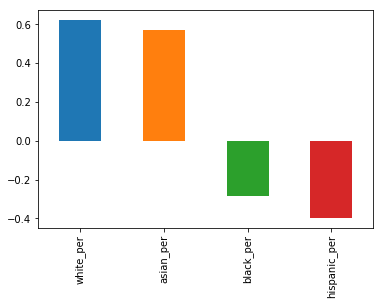

In [41]:
# Correlation coefficients between sat score and %white, %asian, %black, and %hispanic

races = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
correlations[races].plot.bar()

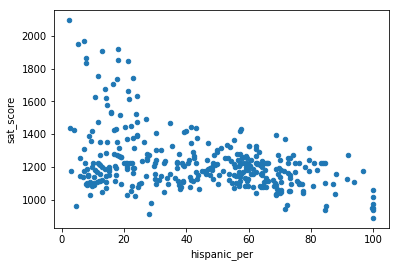

In [55]:
# Scatter plot of sat score vs. %hispanic population

combined.plot.scatter(y='sat_score', x='hispanic_per')

In [50]:
# Schools with higher than 95% hispanic population

combined[combined['hispanic_per'] > 95]['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

In [53]:
# Schools with lower than 10% hispanic population and >1800 average sat score

combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SCHOOL NAME']

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

There are two columns that indicate the percentage of each gender at a school:

- male_per
- female_per

We can plot out the correlations between each percentage and sat_score.

Instructions

Investigate gender differences in SAT scores.
- Make a bar plot of the correlations between the columns above and sat_score.
- Record your findings in a Markdown cell. Are there any unexpected correlations?

Investigate schools with high SAT scores and a high female_per.
- Make a scatter plot of female_per vs. sat_score.
- What does the scatter plot show? Record any interesting observations in a Markdown cell.

Research any schools with a female_per greater than 60% and an average SAT score greater than 1700.
- Find the school names in the data.
- Use Wikipedia and Google to research the schools by name.
- Is there anything interesting about these particular schools? Record your findings in a Markdown cell.

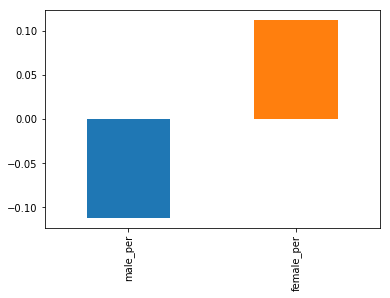

In [57]:
# Correlations between average sat score and %male and %female

correlations[['male_per', 'female_per']].plot.bar()

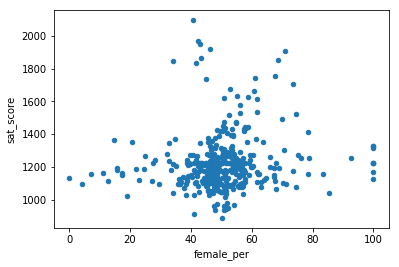

In [58]:
# Scatter plot of %female vs. average SAT score (looks like no correlation basically)

combined.plot.scatter(x='female_per', y='sat_score')

In [60]:
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SCHOOL NAME']

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

very selective liberal arts schools that have high academic standards.

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because total_enrollment is highly correlated with sat_score, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

Instructions

- Calculate the percentage of students in each school that took an AP exam.
    - Divide the AP Test Takers column by the total_enrollment column.
        - The column name AP Test Takers has a space at the end -- don't forget to add it!
    - Assign the result to the ap_per column.
- Investigate the relationship between AP scores and SAT scores.
    - Make a scatter plot of ap_per vs. sat_score.
    - What does the scatter plot show? Record any interesting observations in a Markdown cell.

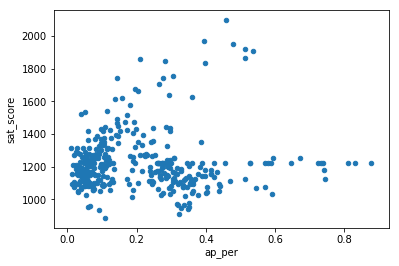

In [66]:
# Create new column of #AP Test Takers / Total Enrollment
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

# Update the correlations Series

correlations = combined.corr()
correlations = correlations['sat_score']

# Plot new column vs. average SAT score
combined.plot.scatter(x='ap_per', y='sat_score')

In [67]:
correlations['ap_per']

0.057170813907669669

Quite a weak correlation.